# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import pandas as pd

path = 'water_potability.csv'

df = pd.read_csv(path)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

# 1- Data preprocessing

## Here we impute the missing values in the data by changing them with mean and then we normalize the data to the same scale (feature scaling) and at the end we split it into training set and test set

In [ ]:

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)


In [ ]:
#Splitting the dataset into target and features
target = "Potability"
X = df.drop(target, axis=1)
Y = df[target]

In [ ]:
X.shape

(3276, 9)

In [ ]:
#Filling missing values with the mean
X.fillna(X.mean(), inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [ ]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# 2- Data splitting

## Here we splitted the data into training and test set using sckit learn

In [ ]:

#from sklearn import train_test_split
from sklearn.model_selection import train_test_split
#trainX, testX = X[:n_train, :], X[n_train:, :]

trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
# split into train and test

# n_train =  len(X_scaled/80)*100
# trainX, testX = X_scaled[n_train:, :], X_scaled[:n_train, :]
# trainY, testY = Y[n_train:], Y[:n_train]

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)




(2620, 9)
(656, 9)
(2620,)
(656,)


# 3- Model architecture

We are settling an initial model architecture which may change later if we are facing  difficulties getting fair accuracies

In [ ]:
trainX.shape[1]

9

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Start the training Process

1. **Using adam optimizer on early stopping**

Train: 0.708, Test: 0.681


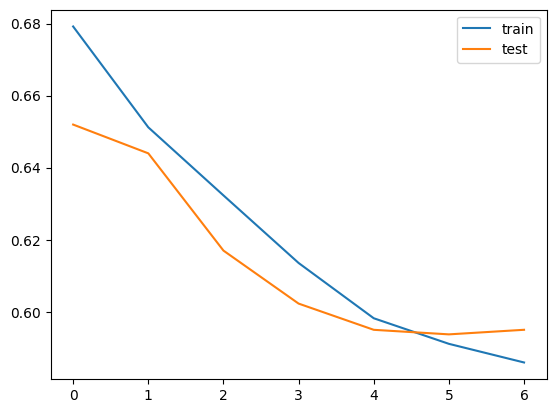

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

es = EarlyStopping()

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(testY)

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64


In [ ]:
import numpy as np
single_input = testX[2]
single_input = np.expand_dims(single_input, axis=0)

prediction = model.predict(single_input)

# Convert the prediction to binary output
binary_output = (prediction > 0.5).astype(int)

print(f'Prediction (Probability): {prediction[0][0]}')
print(f'Binary Output: {binary_output[0][0]}')

1/1 [==============================] - 0s 148ms/step
Prediction (Probability): 0.29691141843795776
Binary Output: 0


In [ ]:
model.save('model1.keras')

**2. Comparing how it performs without using early stopping**

Epoch 1/200
82/82 [==============================] - 1s 7ms/step - loss: 0.5763 - accuracy: 0.6985 - val_loss: 0.5911 - val_accuracy: 0.6890
Epoch 2/200
82/82 [==============================] - 1s 8ms/step - loss: 0.5707 - accuracy: 0.7092 - val_loss: 0.5914 - val_accuracy: 0.6890
Epoch 3/200
82/82 [==============================] - 1s 7ms/step - loss: 0.5689 - accuracy: 0.7115 - val_loss: 0.5942 - val_accuracy: 0.6799
Epoch 4/200
82/82 [==============================] - 0s 4ms/step - loss: 0.5641 - accuracy: 0.7023 - val_loss: 0.5959 - val_accuracy: 0.6936
Epoch 5/200
82/82 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7153 - val_loss: 0.5937 - val_accuracy: 0.6829
Epoch 6/200
82/82 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7202 - val_loss: 0.5951 - val_accuracy: 0.6829
Epoch 7/200
82/82 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.7176 - val_loss: 0.5971 - val_accuracy: 0.6784
Epoch 8/200
8

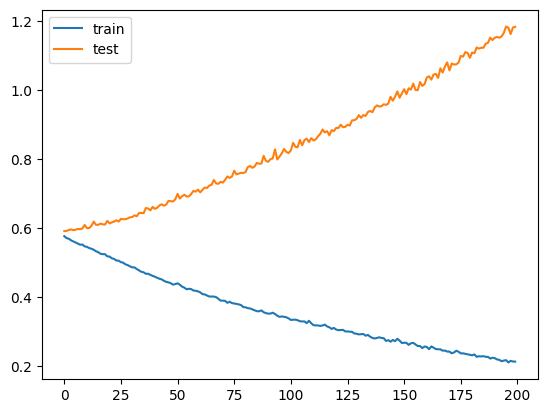

In [ ]:

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, verbose=1)#callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Trying to predict using the new model

In [ ]:
print(testY)

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64


In [ ]:
import numpy as np
single_input = testX[5]
single_input = np.expand_dims(single_input, axis=0)
print(single_input)

prediction = model.predict(single_input)

# Convert the prediction to binary output
binary_output = (prediction > 0.5).astype(int)

print(f'Prediction (Probability): {prediction[0][0]}')
print(f'Binary Output: {binary_output[0][0]}')

[[ 4.14674844 -4.53045357 -0.31664985  1.12755507  1.14484957  0.91621406
  -0.66544825  0.          0.17960389]]
1/1 [==============================] - 0s 17ms/step
Prediction (Probability): 0.9794732928276062
Binary Output: 1


In [ ]:
model.save('model2.keras')

**3. Using adam optimizer with L1**

Train: 0.694, Test: 0.692


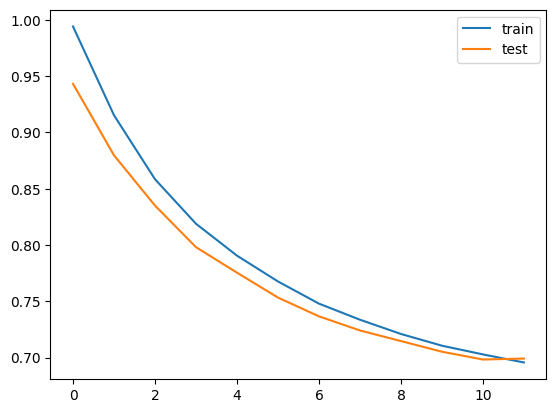

In [ ]:
from keras.regularizers import l1


model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.001)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

#Compile the model
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l1.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l1.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l1.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model_l1.save('keras_model.h5')

# Convert the Keras model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_l1)
tflite_model = converter.convert()

# Save the TFLite model
with open('model_l1.tflite', 'wb') as f:
    f.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###4- L1 with batch normalization

Train: 0.716, Test: 0.662


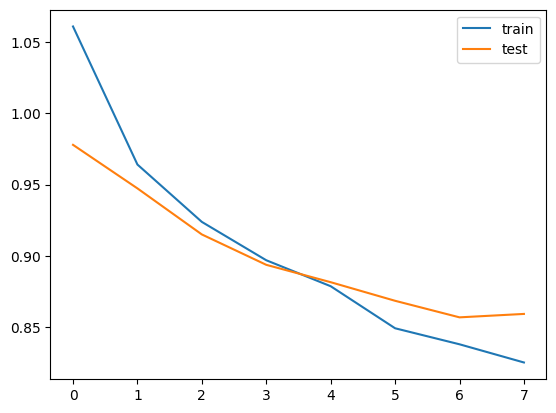

In [18]:
from keras.regularizers import l1


model_l1_batch = Sequential()
model_l1_batch.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.001)))
model_l1_batch.add(tf.keras.layers.BatchNormalization())
model_l1_batch.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model_l1_batch.add(tf.keras.layers.BatchNormalization())
model_l1_batch.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

#Compile the model
model_l1_batch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l1_batch.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l1_batch.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l1_batch.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**4. Using adam optimizer on L2**

Train: 0.711, Test: 0.688


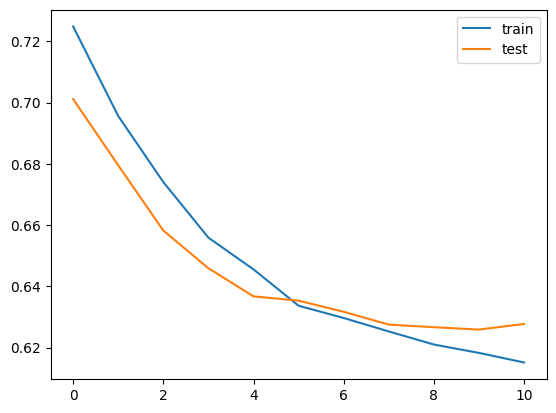

In [ ]:
from keras.regularizers import l2


model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l2.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l2.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.save('model_l2.keras')

### L2 with Droput

Train: 0.689, Test: 0.691


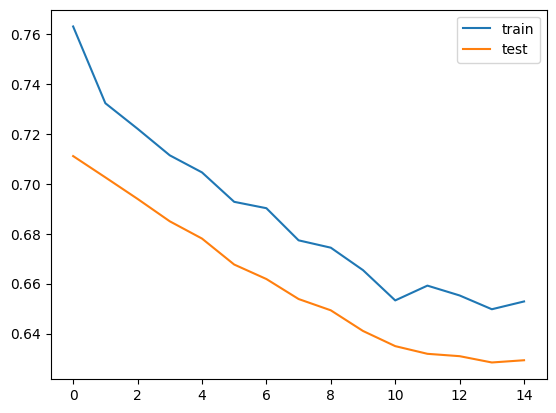

In [19]:
from keras.regularizers import l2


model_l2_dropout = Sequential()
model_l2_dropout.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2_dropout.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l2_dropout.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l2_dropout.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Testing it out

In [ ]:
print(testY)

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64


In [ ]:
import numpy as np
single_input = testX[1]
single_input = np.expand_dims(single_input, axis=0)

prediction = model_l2.predict(single_input)

# Convert the prediction to binary output
binary_output = (prediction > 0.5).astype(int)

print(f'Prediction (Probability): {prediction[0][0]}')
print(f'Binary Output: {binary_output[0][0]}')

1/1 [==============================] - 0s 74ms/step
Prediction (Probability): 0.2880084216594696
Binary Output: 0


Compare the output without Early stopping

**5. Using SGD optimizer on L1**

Train: 0.940, Test: 0.607


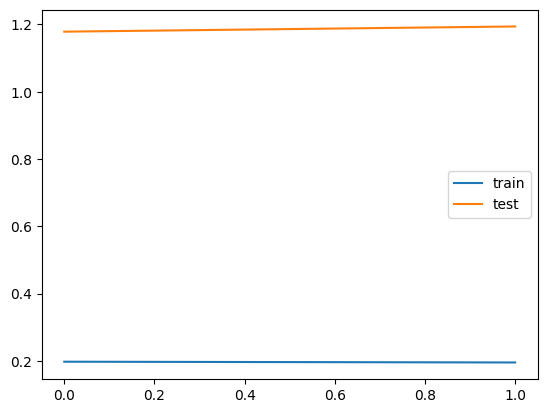

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

es = EarlyStopping()

#Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Model Evaluation



In [ ]:
loss, accu = model.evaluate(X, Y)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accu:.3f}')

103/103 [==============================] - 0s 2ms/step - loss: 1185.8738 - accuracy: 0.3901
Test loss: 1185.874
Test accuracy: 0.390


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
!pip install fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('model_l1.keras')

In [ ]:
import numpy as np
single_input = testX[-2]
single_input = np.expand_dims(single_input, axis=0)

prediction = model.predict(single_input)

# Convert the prediction to binary output
binary_output = (prediction > 0.5).astype(int)

print(f'Prediction (Probability): {prediction[0][0]}')
print(f'Binary Output: {binary_output[0][0]}')

1/1 [==============================] - 0s 47ms/step
Prediction (Probability): 0.9999990463256836
Binary Output: 1


In [ ]:
from fastapi import FastAPI
app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Welcome to the application!"}



In [ ]:
!pip install colabcode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of nbclassic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8

In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)


server.run_app(app=app)

ERROR:pyngrok.process.ngrok:t=2024-06-09T22:15:23+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-06-09T22:15:23+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!pip install uvicorn fastapi pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import multiprocessing as mp

app = FastAPI()

# Load the TensorFlow model
model = tf.keras.layers.TFSMLayer("model_l1", call_endpoint="serving_default")

# Load the scaler and fit it to your data
scaler = StandardScaler()
# Assuming you have your data stored in a numpy array called 'X'
# You may load your dataset here and fit the scaler
# scaler.fit(X)

class InputData(BaseModel):
    data: List[List[float]]

@app.get("/greet/{name}")
def greet_user(name: str):
    return {"message": f"Hello, {name}!"}

@app.post("/predict/")
def predict(data: InputData):
    # Convert data to numpy array
    input_data = np.array(data.data)

    # Transform the input data using the fitted scaler
    input_data_scaled = scaler.transform(input_data)

    # Make predictions
    predictions = model.predict(input_data_scaled)

    return {"predictions": predictions.tolist()}




AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'TFSMLayer'

In [ ]:
if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio
import uvicorn
import nest_asyncio

nest_asyncio.apply()

async def main():
    config = uvicorn.Config(app, host="127.0.0.1", port=8000)
    server = uvicorn.Server(config)
    await server.serve()

if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    try:
        loop.run_until_complete(main())
    except KeyboardInterrupt:
        pass
    finally:
        loop.close()

INFO:     Started server process [602]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


In [ ]:
import uvicorn
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def read_root():
    return {"Hello": "World"}




In [ ]:


if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)